# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing UCB

In [4]:
import math
N = 10000
d = 10
ads_selected = []
number_of_selections = [0] * d 
sums_of_rewards = [0] * d
total_reward = 0

In [8]:

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (number_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    number_of_selections[ad] = number_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [6]:
#ads_selected[:130]

## Visualising the results

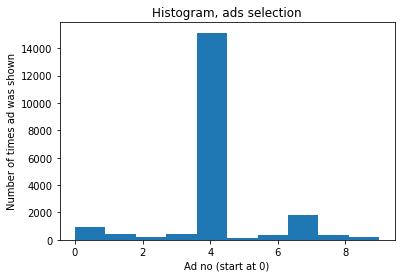

In [9]:
plt.hist(ads_selected)
plt.title('Histogram, ads selection')
plt.xlabel('Ad no (start at 0)')
plt.ylabel('Number of times ad was shown')
plt.show()